<a href="https://colab.research.google.com/github/shubhamgogri/Python--DS/blob/main/EDA/BlackFriday/BlackFriday.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem Statement

A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month. The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv') 

In [3]:
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [24]:
# Merge the train and test data
fd = df_train.append(df_test)

In [7]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3.0,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1.0,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12.0,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12.0,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8.0,NaN,NaN,7969.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 288643 entries, 0 to 153113
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     288643 non-null  int64  
 1   Product_ID                  288643 non-null  object 
 2   Gender                      288643 non-null  object 
 3   Age                         288643 non-null  object 
 4   Occupation                  288643 non-null  int64  
 5   City_Category               288643 non-null  object 
 6   Stay_In_Current_City_Years  288643 non-null  object 
 7   Marital_Status              288643 non-null  int64  
 8   Product_Category_1          288642 non-null  float64
 9   Product_Category_2          199054 non-null  float64
 10  Product_Category_3          87960 non-null   float64
 11  Purchase                    135528 non-null  float64
dtypes: float64(4), int64(3), object(5)
memory usage: 28.6+ MB


In [31]:
fd.describe()

,Gender,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,288643.000000,288643.000000,288643.000000,288642.000000,199054.000000,87960.000000,135528.000000
mean,0.753609,8.088795,0.410081,5.288963,9.851141,12.663813,9300.093700
std,0.430910,6.522577,0.491849,3.739542,5.093209,4.121791,4980.141216
min,0.000000,0.000000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1.000000,2.000000,0.000000,1.000000,5.000000,9.000000,5847.000000
50%,1.000000,7.000000,0.000000,5.000000,9.000000,14.000000,8051.000000
75%,1.000000,14.000000,1.000000,8.000000,15.000000,16.000000,12057.000000
max,1.000000,20.000000,1.000000,18.000000,18.000000,18.000000,23961.000000


In [25]:
# User Id is not of use hence delete it
fd.drop(['User_ID'], axis = 1, inplace = True)
# for axis = 1 = vertical 
# for axis = 0 = Horizontal

In [29]:
fd.columns

Index(['Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

Convert Categorical Features into Numerical ones.


Gender

In [26]:
# df['Gender'] = df['Gender'].map({'F':0, 'M':1})
# or
fd['Gender'] = pd.get_dummies(fd['Gender'], drop_first = 1)

In [28]:
fd.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0-17,10,A,2,0,3.0,NaN,NaN,8370.0
1,P00248942,0,0-17,10,A,2,0,1.0,6.0,14.0,15200.0
2,P00087842,0,0-17,10,A,2,0,12.0,NaN,NaN,1422.0
3,P00085442,0,0-17,10,A,2,0,12.0,14.0,NaN,1057.0
4,P00285442,1,55+,16,C,4+,0,8.0,NaN,NaN,7969.0


Handling Age


In [32]:
fd['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [33]:
fd['Age'] = fd['Age'].map({'0-17':1, '18-25':2, '26-35': 3, '36-45': 4, '46-50': 5, '51-55': 6,'55+':7})


In [34]:
fd.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,A,2,0,3.0,NaN,NaN,8370.0
1,P00248942,0,1,10,A,2,0,1.0,6.0,14.0,15200.0
2,P00087842,0,1,10,A,2,0,12.0,NaN,NaN,1422.0
3,P00085442,0,1,10,A,2,0,12.0,14.0,NaN,1057.0
4,P00285442,1,7,16,C,4+,0,8.0,NaN,NaN,7969.0


In [ ]:
# Second Technique not a good technique

from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
fd['Age'] = label_encoder.fit_transform(df['Age'])
fd['Age'].unique()

City 

In [36]:
# created a dataframe using dummies to represent A,B,C
fd_city = pd.get_dummies(fd['City_Category'], drop_first =True)
fd_city.head()

,B,C
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1


In [37]:
fd = pd.concat([fd , fd_city], axis = 1)
fd
# added the new one to the fd 

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,A,2,0,3.0,NaN,NaN,8370.0,0,0
1,P00248942,0,1,10,A,2,0,1.0,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,A,2,0,12.0,NaN,NaN,1422.0,0,0
3,P00085442,0,1,10,A,2,0,12.0,14.0,NaN,1057.0,0,0
4,P00285442,1,7,16,C,4+,0,8.0,NaN,NaN,7969.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
153109,P00182242,1,3,2,B,1,1,1.0,5.0,6.0,NaN,1,0
153110,P00339942,1,3,2,B,1,1,1.0,NaN,NaN,NaN,1,0
153111,P00014842,1,3,2,B,1,1,1.0,2.0,5.0,NaN,1,0
153112,P00190942,1,2,4,C,2,0,3.0,4.0,NaN,NaN,0,1


In [40]:
fd.drop(['City_Category'], axis = 1, inplace = True)
# deleted the original City Column

Mising Values


In [43]:
fd.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 1
Product_Category_2             89589
Product_Category_3            200683
Purchase                      153115
B                                  0
C                                  0
dtype: int64

Focus on Replacing the missing values

Product_category_1

In [44]:
fd['Product_Category_1'].unique()

array([ 3.,  1., 12.,  8.,  5.,  4.,  2.,  6., 14., 11., 13., 15.,  7.,
       16., 18., 10., 17.,  9., nan])

In [45]:
fd['Product_Category_1'].value_counts()

5.0     80153
1.0     74208
8.0     60124
11.0    12797
2.0     12584
6.0     10772
3.0     10688
4.0      6204
16.0     5054
15.0     3343
13.0     2910
10.0     2760
12.0     2082
7.0      1984
18.0     1618
14.0      813
17.0      307
9.0       241
Name: Product_Category_1, dtype: int64

SO to replace the nan value replace it with mode due to its Descrete nature of Values

In [47]:
fd['Product_Category_1'].mode()[0]

5.0

In [48]:
fd['Product_Category_1'] = fd['Product_Category_1'].fillna(fd['Product_Category_1'].mode()[0])

In [49]:
fd['Product_Category_1'].isnull().sum()

0

"Product_Category_2"

In [51]:
fd['Product_Category_2'] = fd['Product_Category_2'].fillna(fd['Product_Category_2'].mode()[0])

In [52]:
fd['Product_Category_2'].isnull().sum()

0

"Product_Category_3"

In [53]:
fd['Product_Category_3'] = fd['Product_Category_3'].fillna(fd['Product_Category_3'].mode()[0])

In [54]:
fd['Product_Category_2'].isnull().sum()

0

In [55]:
fd.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2                 0
Product_Category_3                 0
Purchase                      153115
B                                  0
C                                  0
dtype: int64

Stay_In_Current_City_Years         

In [56]:
fd['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [60]:
fd['Stay_In_Current_City_Years'] = fd['Stay_In_Current_City_Years'].str.replace('+','')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


In [61]:
fd['Stay_In_Current_City_Years'].unique()

array(['2', '4', '3', '1', '0'], dtype=object)

In [62]:
fd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 288643 entries, 0 to 153113
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  288643 non-null  object 
 1   Gender                      288643 non-null  uint8  
 2   Age                         288643 non-null  int64  
 3   Occupation                  288643 non-null  int64  
 4   Stay_In_Current_City_Years  288643 non-null  object 
 5   Marital_Status              288643 non-null  int64  
 6   Product_Category_1          288643 non-null  float64
 7   Product_Category_2          288643 non-null  float64
 8   Product_Category_3          288643 non-null  float64
 9   Purchase                    135528 non-null  float64
 10  B                           288643 non-null  uint8  
 11  C                           288643 non-null  uint8  
dtypes: float64(4), int64(3), object(2), uint8(3)
memory usage: 30.9+ MB


Convert Object into Integers

In [63]:
fd['Stay_In_Current_City_Years'] = fd['Stay_In_Current_City_Years'].astype(int)

In [64]:
fd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 288643 entries, 0 to 153113
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  288643 non-null  object 
 1   Gender                      288643 non-null  uint8  
 2   Age                         288643 non-null  int64  
 3   Occupation                  288643 non-null  int64  
 4   Stay_In_Current_City_Years  288643 non-null  int64  
 5   Marital_Status              288643 non-null  int64  
 6   Product_Category_1          288643 non-null  float64
 7   Product_Category_2          288643 non-null  float64
 8   Product_Category_3          288643 non-null  float64
 9   Purchase                    135528 non-null  float64
 10  B                           288643 non-null  uint8  
 11  C                           288643 non-null  uint8  
dtypes: float64(4), int64(4), object(1), uint8(3)
memory usage: 30.9+ MB


In [65]:
fd['B'] = fd['B'].astype(int)
fd['C'] = fd['C'].astype(int)

In [66]:
fd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 288643 entries, 0 to 153113
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  288643 non-null  object 
 1   Gender                      288643 non-null  uint8  
 2   Age                         288643 non-null  int64  
 3   Occupation                  288643 non-null  int64  
 4   Stay_In_Current_City_Years  288643 non-null  int64  
 5   Marital_Status              288643 non-null  int64  
 6   Product_Category_1          288643 non-null  float64
 7   Product_Category_2          288643 non-null  float64
 8   Product_Category_3          288643 non-null  float64
 9   Purchase                    135528 non-null  float64
 10  B                           288643 non-null  int64  
 11  C                           288643 non-null  int64  
dtypes: float64(4), int64(6), object(1), uint8(1)
memory usage: 34.8+ MB


Visualization the best one

In [ ]:
# sns.pairplot(fd)

Age vs Purchase

Observation: 
Purchasing of man is higher than Woman

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


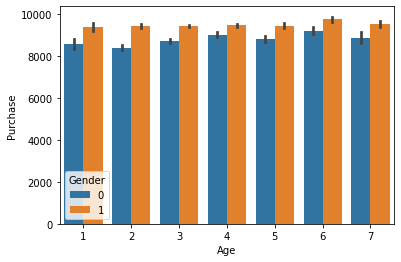

In [68]:
sns.barplot('Age', 'Purchase', hue = 'Gender', data = fd)

Occupation vs Purchase

DOnt Affect much

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


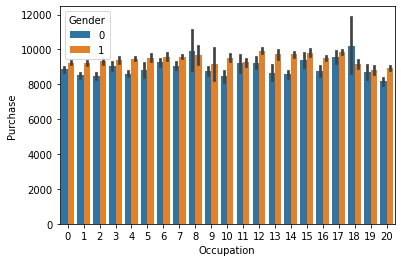

In [69]:
sns.barplot('Occupation', 'Purchase', hue = 'Gender', data = fd)

ProductCategory1 vs Purchase

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


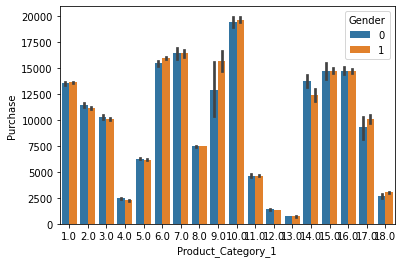

In [71]:
sns.barplot('Product_Category_1', 'Purchase', hue = 'Gender', data = fd)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


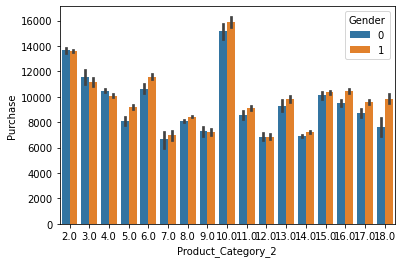

In [72]:
sns.barplot('Product_Category_2', 'Purchase', hue = 'Gender', data = fd)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


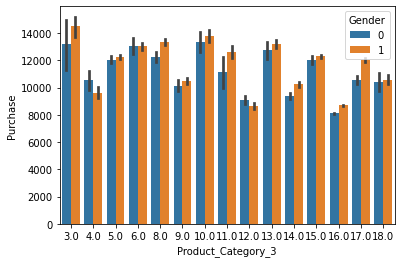

In [73]:
sns.barplot('Product_Category_3', 'Purchase', hue = 'Gender', data = fd)

In [91]:
fd.drop(['Product_ID'], axis = 1, inplace =True)

In [92]:
fd.head()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,0,1,10,2,0,3.0,8.0,16.0,8370.0,0,0
1,0,1,10,2,0,1.0,6.0,14.0,15200.0,0,0
2,0,1,10,2,0,12.0,8.0,16.0,1422.0,0,0
3,0,1,10,2,0,12.0,14.0,16.0,1057.0,0,0
4,1,7,16,4,0,8.0,8.0,16.0,7969.0,0,1


split the data into train and test ones 

In [93]:
fd_test = fd[fd['Purchase'].isnull()] 

In [94]:
fd_test.head()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
135528,0,4,20,3,0,8.0,14.0,16.0,NaN,1,0
0,1,5,7,2,1,1.0,11.0,16.0,NaN,1,0
1,1,3,17,0,0,3.0,5.0,16.0,NaN,0,1
2,0,4,1,4,1,5.0,14.0,16.0,NaN,1,0
3,0,4,1,4,1,4.0,9.0,16.0,NaN,1,0


In [95]:
fd_train = fd[-fd['Purchase'].isnull()]

In [96]:
fd_train.head()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,0,1,10,2,0,3.0,8.0,16.0,8370.0,0,0
1,0,1,10,2,0,1.0,6.0,14.0,15200.0,0,0
2,0,1,10,2,0,12.0,8.0,16.0,1422.0,0,0
3,0,1,10,2,0,12.0,14.0,16.0,1057.0,0,0
4,1,7,16,4,0,8.0,8.0,16.0,7969.0,0,1


Feature Scaling

In [97]:
# Independent Feature
x = fd_train.drop(['Purchase'], axis = 1)

In [98]:
x.shape

(135528, 10)

In [99]:
# Dependent Feature
y = fd_train['Purchase']
y.head()

0     8370.0
1    15200.0
2     1422.0
3     1057.0
4     7969.0
Name: Purchase, dtype: float64

In [100]:
y.shape

(135528,)

In [101]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [102]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Till now the data is ready for the model training
